# Import

In [2]:
from pandas import read_csv, concat
from datetime import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

import numpy as np
import datetime

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load data

In [4]:
dt_parse = lambda dates: dt.strptime(dates, '%Y-%m-%d %H:%M:%S')

train = read_csv('data/transformed/2000_2021_Brazilian_North_Region_hourly_MWmed_hydroelectric_power_series.csv',
                 header=0, names=['index','value', 'date'], index_col='index', parse_dates=True, squeeze=True)
# test = read_csv('your_train_series.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train['value'] = train['value'].astype(float)
train['date'] = train['date'].astype('datetime64')
train = train[train['value'] > 0.0]

train.head()


,value,date
index,,
2000-01-01 00:00:00,2422.5,2000-01-01 00:00:00
2000-01-01 01:00:00,2769.3,2000-01-01 01:00:00
2000-01-01 02:00:00,3124.7,2000-01-01 02:00:00
2000-01-01 03:00:00,3154.6,2000-01-01 03:00:00
2000-01-01 04:00:00,3121.8,2000-01-01 04:00:00


# Prepare data

In [5]:
split_date = '1/1/2019 12:00:00 AM'
test  = train[split_date : ]
train = train[ : split_date]

test.head()

,value,date
index,,
2019-01-01 00:00:00,7297.073,2019-01-01 00:00:00
2019-01-01 01:00:00,6900.449,2019-01-01 01:00:00
2019-01-01 02:00:00,6869.606,2019-01-01 02:00:00
2019-01-01 03:00:00,6856.405,2019-01-01 03:00:00
2019-01-01 04:00:00,6853.338,2019-01-01 04:00:00


# Prepare data

In [6]:
train = train['value']
test = test['value']

test = test.values
train = [x for x in train]

# Walk-forward validation

O que o modelo de persistencia faz?

O modelo de persistencia fala que o valor de n é igual ao de n + 1.

In [7]:
predictions = list()
for i in range(len(test)):
    # Predict
    yhat = train[-1]
    # Store forecast in list of predictions
    predictions.append(yhat)
    # Add actual observation to train for the next loop
    obs = test[i]
    train.append(obs)
    print(f">Predicted={yhat}, Expected={obs}")

>Predicted=7297.073, Expected=7297.073
>Predicted=7297.073, Expected=6900.449
>Predicted=6900.449, Expected=6869.606
>Predicted=6869.606, Expected=6856.405
>Predicted=6856.405, Expected=6853.338
>Predicted=6853.338, Expected=6876.66
>Predicted=6876.66, Expected=6843.668
>Predicted=6843.668, Expected=6828.58
>Predicted=6828.58, Expected=6834.765
>Predicted=6834.765, Expected=6883.663
>Predicted=6883.663, Expected=7301.115
>Predicted=7301.115, Expected=8279.823
>Predicted=8279.823, Expected=8431.843
>Predicted=8431.843, Expected=8858.475
>Predicted=8858.475, Expected=9127.483
>Predicted=9127.483, Expected=9033.636
>Predicted=9033.636, Expected=8925.745
>Predicted=8925.745, Expected=8601.278
>Predicted=8601.278, Expected=8882.144
>Predicted=8882.144, Expected=9943.589
>Predicted=9943.589, Expected=10288.532
>Predicted=10288.532, Expected=10437.889
>Predicted=10437.889, Expected=10566.798
>Predicted=10566.798, Expected=10532.248
>Predicted=10532.248, Expected=9909.545
>Predicted=9909.545, 

# Report performance

O resultado do modelo de persistencia da a baseline. Basicamente permite comparar outros modelos com o seu resultado para assim checar sua eficiencia.

Vantangens do modelo de persistencia:
- Simples
- Rapido
- Facil de replicar

In [8]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 409.578


# Plot predicted vs expected values

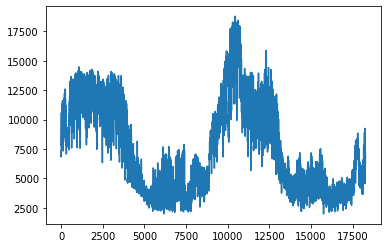

In [9]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()